In [1]:
import numpy as np
from math import factorial

In [2]:
def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

#### Задача 1

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

#### Решение 
Пусть  𝑋  — дискретная случайная величина, означающая число правильных ответов. Закон распределения этой случайной величины — это соответствие между значениями, которые принимает эта величина, и вероятностями, с которыми она их принимает.
для расчета вероятности для отдельно взятой СВ воспользуемся формулой Бернулли
$$p(k) = C_n^kp^kq^{n-k}$$

In [3]:
#p - вероятность правильного ответа на любой из пяти вопросов;
p = 1/4 #отвечая на лбой из пяти вопросов нам нужно выбрать один правильный ответ из четырех;
p

0.25

In [4]:
#n - количество вопросов
#k - количество правильных ответов
X = np.arange(0,6)  #[0,1,2,3,4,5] #число правильных ответов
P = [] #вероятность для соответствующего дискретного значения СВ
n = 5
sum = 0
for k in range(0,6):
    
    Pk = combinations(n,k) * (p**k) * ((1-p)**(n-k))
    P.append(Pk)
    sum = sum + Pk 
    print(X[k], Pk)
print("Контроль общей суммы всех вероятностей:",sum)


0 0.2373046875
1 0.3955078125
2 0.263671875
3 0.087890625
4 0.0146484375
5 0.0009765625
Контроль общей суммы всех вероятностей: 1.0


In [5]:
Mx = X.dot(P)
Mx

1.25

In [6]:
y_values = X - Mx
print(y_values)

[-1.25 -0.25  0.75  1.75  2.75  3.75]


In [7]:
z_values = y_values**2
Dx = z_values.dot(P)
print(Dx)


0.9375


#### Задача 2

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

#### Решение

Случайная величина $X$ принимает значения $0, 1, 2, \dots$ (счётное множество значений), а соответствующие вероятности выражаются __формулой Пуассона__:
$$P(X = k) = \dfrac{\lambda^k e^{-\lambda}}{k!}$$

Здесь $\lambda$ — положительное вещественное число.

по условию задачи 0.95 -- это сумма нескольких вероятностей
Вероятность получить не более N писем предполагает получение от 0 до N писем:
$$P(X \leq N) = \displaystyle\sum_{i = 0}^{N} \dfrac{10^{i} e^{-10}}{i!}$$
величину N отсюда выразить крайне сложно, поэтому можно попробовать решить итеративно, складывая вероятность по каждому шагу i в цикле, отслеживая превышение совокупной вероятности 0.95 -- так найдем N

In [8]:
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [9]:
lambda_ = 10
sum = 0
i = -1
while (sum <= 0.95):
        i = i+1
        sum = sum + poisson_proba(k=i, lambda_=lambda_)
print("Ответ: N=", i)

Ответ: N= 15


проверим в Wolfram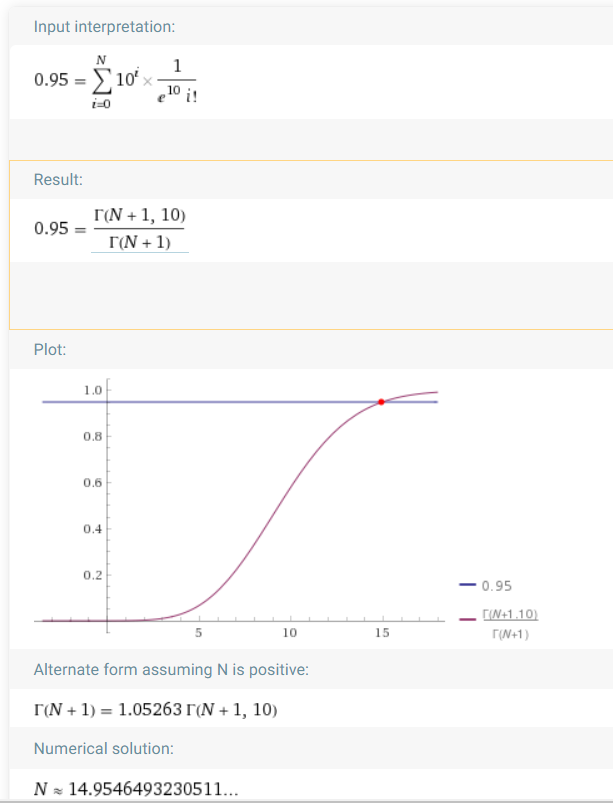

#### Задание 3

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?
Подсказка. Здесь предстоит немножко покодить.
#### РЕШЕНИЕ

Пусть имеется некоторое событие $A$, которое наступает с вероятностью $p$. __Биномиальный закон__ описывает распределение случайной величины $X$, задающей число наступлений события $A$ в ходе проведения $n$ независимых опытов.

Биномиальный закон распределения описывается __формулой Бернулли__:
$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

идея решения в том, чтобы совокупная вероятность попаданий 6 и более раз из N выстрелов превышала 0.9
данную совокупную вероятность удобно получать как (1 - PPPPP), где PPPPP = P(X<6) - это совокупная вероятность попаданий от 0 до 5 раз

In [10]:
p=0.01
k=6
n=6
P=0

while (P<0.9):    
    k=0
    P_0 = combinations(n,k) * (p**k) * ((1-p)**(n-k))
    k=1
    P_1 = combinations(n,k) * (p**k) * ((1-p)**(n-k))
    k=2
    P_2 = combinations(n,k) * (p**k) * ((1-p)**(n-k))
    k=3
    P_3 = combinations(n,k) * (p**k) * ((1-p)**(n-k))
    k=4
    P_4 = combinations(n,k) * (p**k) * ((1-p)**(n-k))
    k=5
    P_5 = combinations(n,k) * (p**k) * ((1-p)**(n-k))
    
    PPPPP = P_0 + P_1 + P_2 + P_3 + P_4 + P_5
    P = (1-PPPPP)
    print(f"Итерация:{n}, P(X<6)={PPPPP},P(X>=6)={P}")
    n = n+1 #к следующей итерации

Итерация:6, P(X<6)=0.999999999999,P(X>=6)=9.999778782798785e-13
Итерация:7, P(X<6)=0.9999999999930599,P(X>=6)=6.940115149234316e-12
Итерация:8, P(X<6)=0.999999999972478,P(X>=6)=2.752198469124778e-11
Итерация:9, P(X<6)=0.9999999999181411,P(X>=6)=8.185885302935958e-11
Итерация:10, P(X<6)=0.999999999797106,P(X>=6)=2.028940349063646e-10
Итерация:11, P(X<6)=0.9999999995574566,P(X>=6)=4.42543446332877e-10
Итерация:12, P(X<6)=0.9999999991224927,P(X>=6)=8.775072890543356e-10
Итерация:13, P(X<6)=0.9999999983842969,P(X>=6)=1.6157031268448918e-09
Итерация:14, P(X<6)=0.9999999971967245,P(X>=6)=2.8032755006179855e-09
Итерация:15, P(X<6)=0.9999999953678629,P(X>=6)=4.632137118321111e-09
Итерация:16, P(X<6)=0.9999999926520035,P(X>=6)=7.347996544559976e-09
Итерация:17, P(X<6)=0.9999999887411659,P(X>=6)=1.1258834087257696e-08
Итерация:18, P(X<6)=0.9999999832562164,P(X>=6)=1.67437835818518e-08
Итерация:19, P(X<6)=0.9999999757376163,P(X>=6)=2.4262383657713826e-08
Итерация:20, P(X<6)=0.9999999656358401,P(X